In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import sklearn.linear_model 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
house= pd.read_csv("data.csv")
house

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
data = pd.DataFrame(house)
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
data.shape

(4600, 18)

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
data['price']=data['price'].astype('int64')
data['bedrooms']=data['bedrooms'].astype('int64')
data['bathrooms']=data['bathrooms'].astype('int64')
data['floors']=data['floors'].astype('int64')
data['street']=data['street'].astype('string')
data['city']=data['city'].astype('string')
data['statezip']=data['statezip'].astype('string')
data['country']=data['country'].astype('string')                                 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int64 
 2   bedrooms       4600 non-null   int64 
 3   bathrooms      4600 non-null   int64 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int64 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   string
 15  city           4600 non-null   string
 16  statezip       4600 non-null   string
 17  country        4600 non-null   string
dtypes: int64(13), object(1), str

In [10]:
data.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.0,4.00,9.0
bathrooms,4600.0,1.788913,0.752185,0.0,1.00,2.0,2.00,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,1.459130,0.552194,1.0,1.00,1.0,2.00,3.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


In [12]:
(data.price==0).sum()

49

In [13]:
data.price.replace(0,np.nan,inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   int64  
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   int64  
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   string 
 15  city           4600 non-null   string 
 16  statezip       4600 non-null   string 
 17  country        4600 non-null   string 
dtypes: float

In [15]:
data.dropna(inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4551 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4551 non-null   int64  
 3   bathrooms      4551 non-null   int64  
 4   sqft_living    4551 non-null   int64  
 5   sqft_lot       4551 non-null   int64  
 6   floors         4551 non-null   int64  
 7   waterfront     4551 non-null   int64  
 8   view           4551 non-null   int64  
 9   condition      4551 non-null   int64  
 10  sqft_above     4551 non-null   int64  
 11  sqft_basement  4551 non-null   int64  
 12  yr_built       4551 non-null   int64  
 13  yr_renovated   4551 non-null   int64  
 14  street         4551 non-null   string 
 15  city           4551 non-null   string 
 16  statezip       4551 non-null   string 
 17  country        4551 non-null   string 
dtypes: float

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.885959,563929.874935,7800.0,326264.0,465000.0,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.0,3.0,4.0,9.0
bathrooms,4551.0,1.782905,0.744431,0.0,1.0,2.0,2.0,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.0,1970.0,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.0,7680.0,10978.0,1074218.0
floors,4551.0,1.459240,0.552355,1.0,1.0,1.0,2.0,3.0
waterfront,4551.0,0.006592,0.080932,0.0,0.0,0.0,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.0,0.0,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.0,3.0,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.0,1590.0,2300.0,9410.0


In [18]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [19]:
data['date']=pd.to_datetime(data['date'])

In [20]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [21]:
data.insert(1, "year", data.date.dt.year)

In [22]:
data

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,2014,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,2014,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,2014,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [23]:
data.corr()

C:\Users\abhia\AppData\Local\Temp\ipykernel_34040\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,NaN,1.000000,0.210228,0.331917,0.445494,0.051347,0.138342,0.150083,0.242587,0.038892,0.380661,0.217782,0.021757,-0.029034
bedrooms,NaN,0.210228,1.000000,0.499640,0.596053,0.071138,0.154922,-0.005521,0.115080,0.023018,0.485672,0.335103,0.141498,-0.062219
bathrooms,NaN,0.331917,0.499640,1.000000,0.706352,0.111565,0.466471,0.056590,0.196671,-0.118957,0.645209,0.268266,0.394298,-0.188182
sqft_living,NaN,0.445494,0.596053,0.706352,1.000000,0.213268,0.339348,0.107758,0.309343,-0.062529,0.875657,0.449671,0.284733,-0.121589
sqft_lot,NaN,0.051347,0.071138,0.111565,0.213268,1.000000,-0.005019,0.017408,0.072527,0.000929,0.219193,0.035894,0.049163,-0.021068
floors,NaN,0.138342,0.154922,0.466471,0.339348,-0.005019,1.000000,0.010928,0.022631,-0.305362,0.516264,-0.252654,0.561159,-0.248916
waterfront,NaN,0.150083,-0.005521,0.056590,0.107758,0.017408,0.010928,1.000000,0.347572,0.006112,0.072502,0.088880,-0.032017,0.015821
view,NaN,0.242587,0.115080,0.196671,0.309343,0.072527,0.022631,0.347572,1.000000,0.062560,0.174629,0.317117,-0.066344,0.025846
condition,NaN,0.038892,0.023018,-0.118957,-0.062529,0.000929,-0.305362,0.006112,0.062560,1.000000,-0.176549,0.197144,-0.398886,-0.184483


<Axes: title={'center': 'HEAT MAP'}>

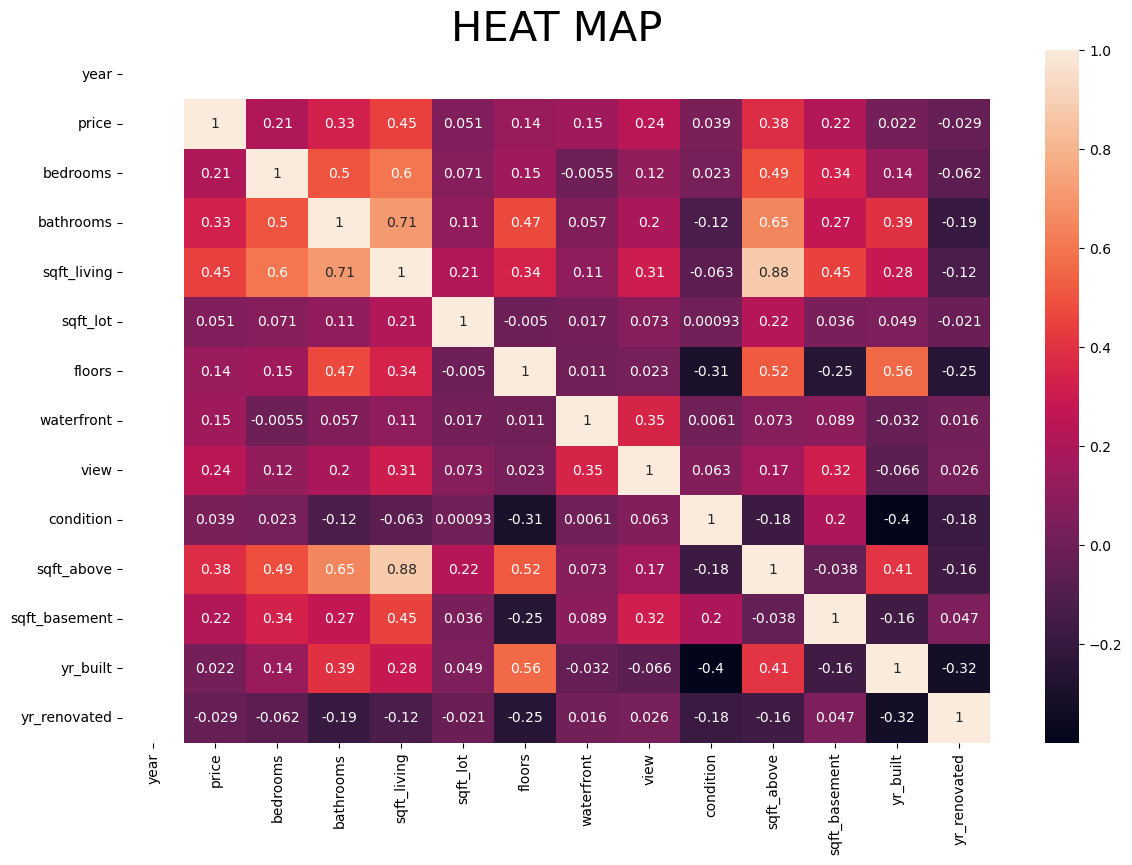

In [24]:
plt.figure(figsize=(14,9))
plt.title("HEAT MAP",size=30)
sns.heatmap(data.corr(numeric_only = True), annot=True)

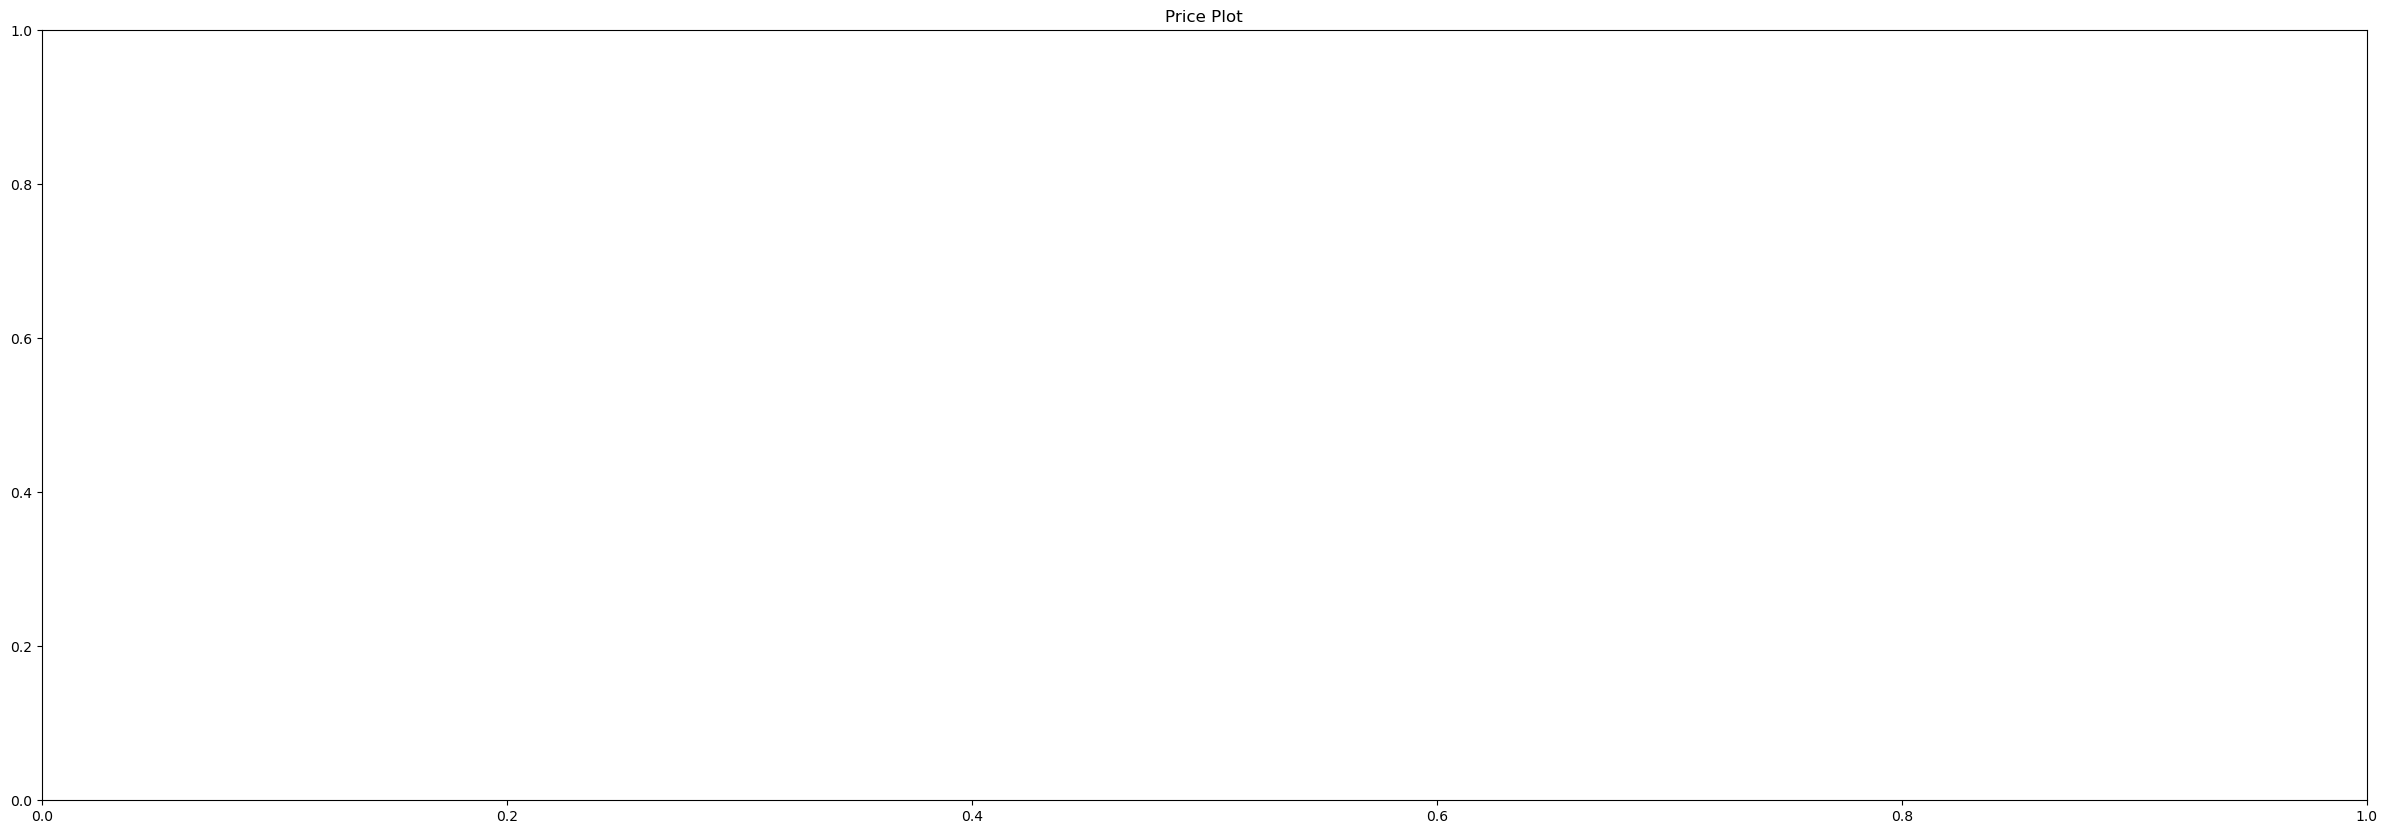

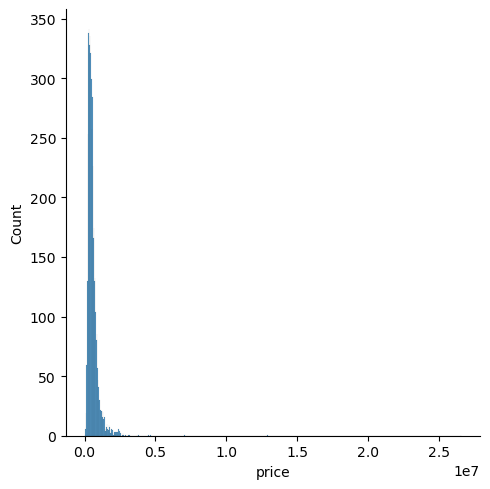

In [25]:
plt.figure(figsize=(30,10))
plt.title('Price Plot')
sns.displot(data["price"])

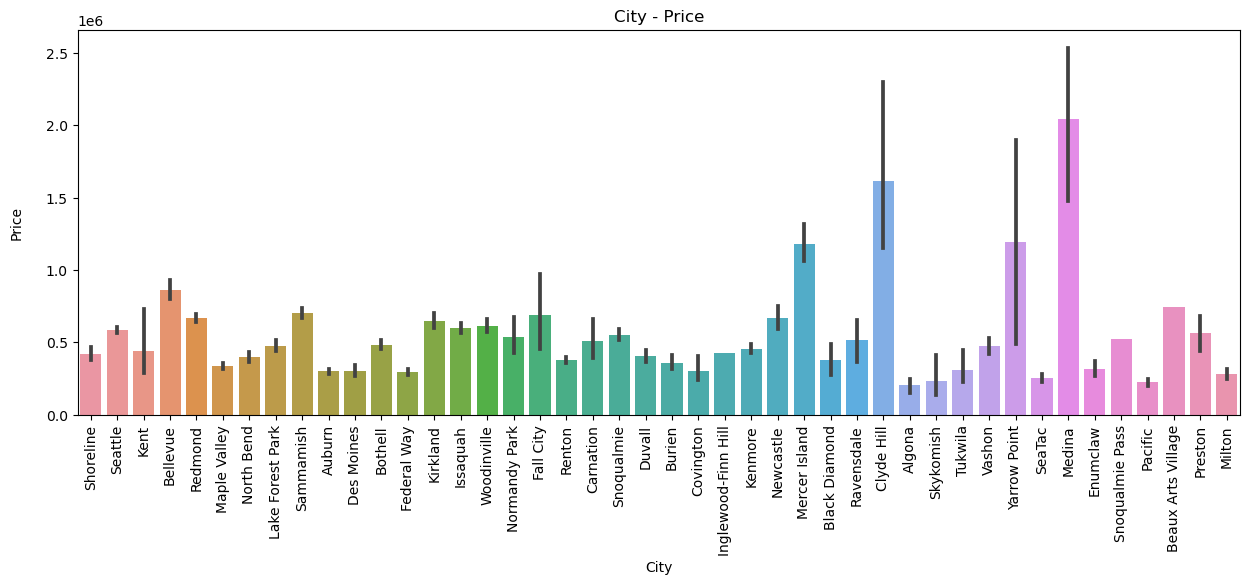

In [26]:
plt.figure(figsize=(15, 5))
sns.barplot(x = data['city'], y = data.price)
plt.xticks( horizontalalignment="center",rotation = 90 )
plt.xlabel("City")
plt.title("City - Price")
plt.ylabel("Price\n")

plt.show()

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>],
       [<Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>, <Axes: >]], dtype=object)

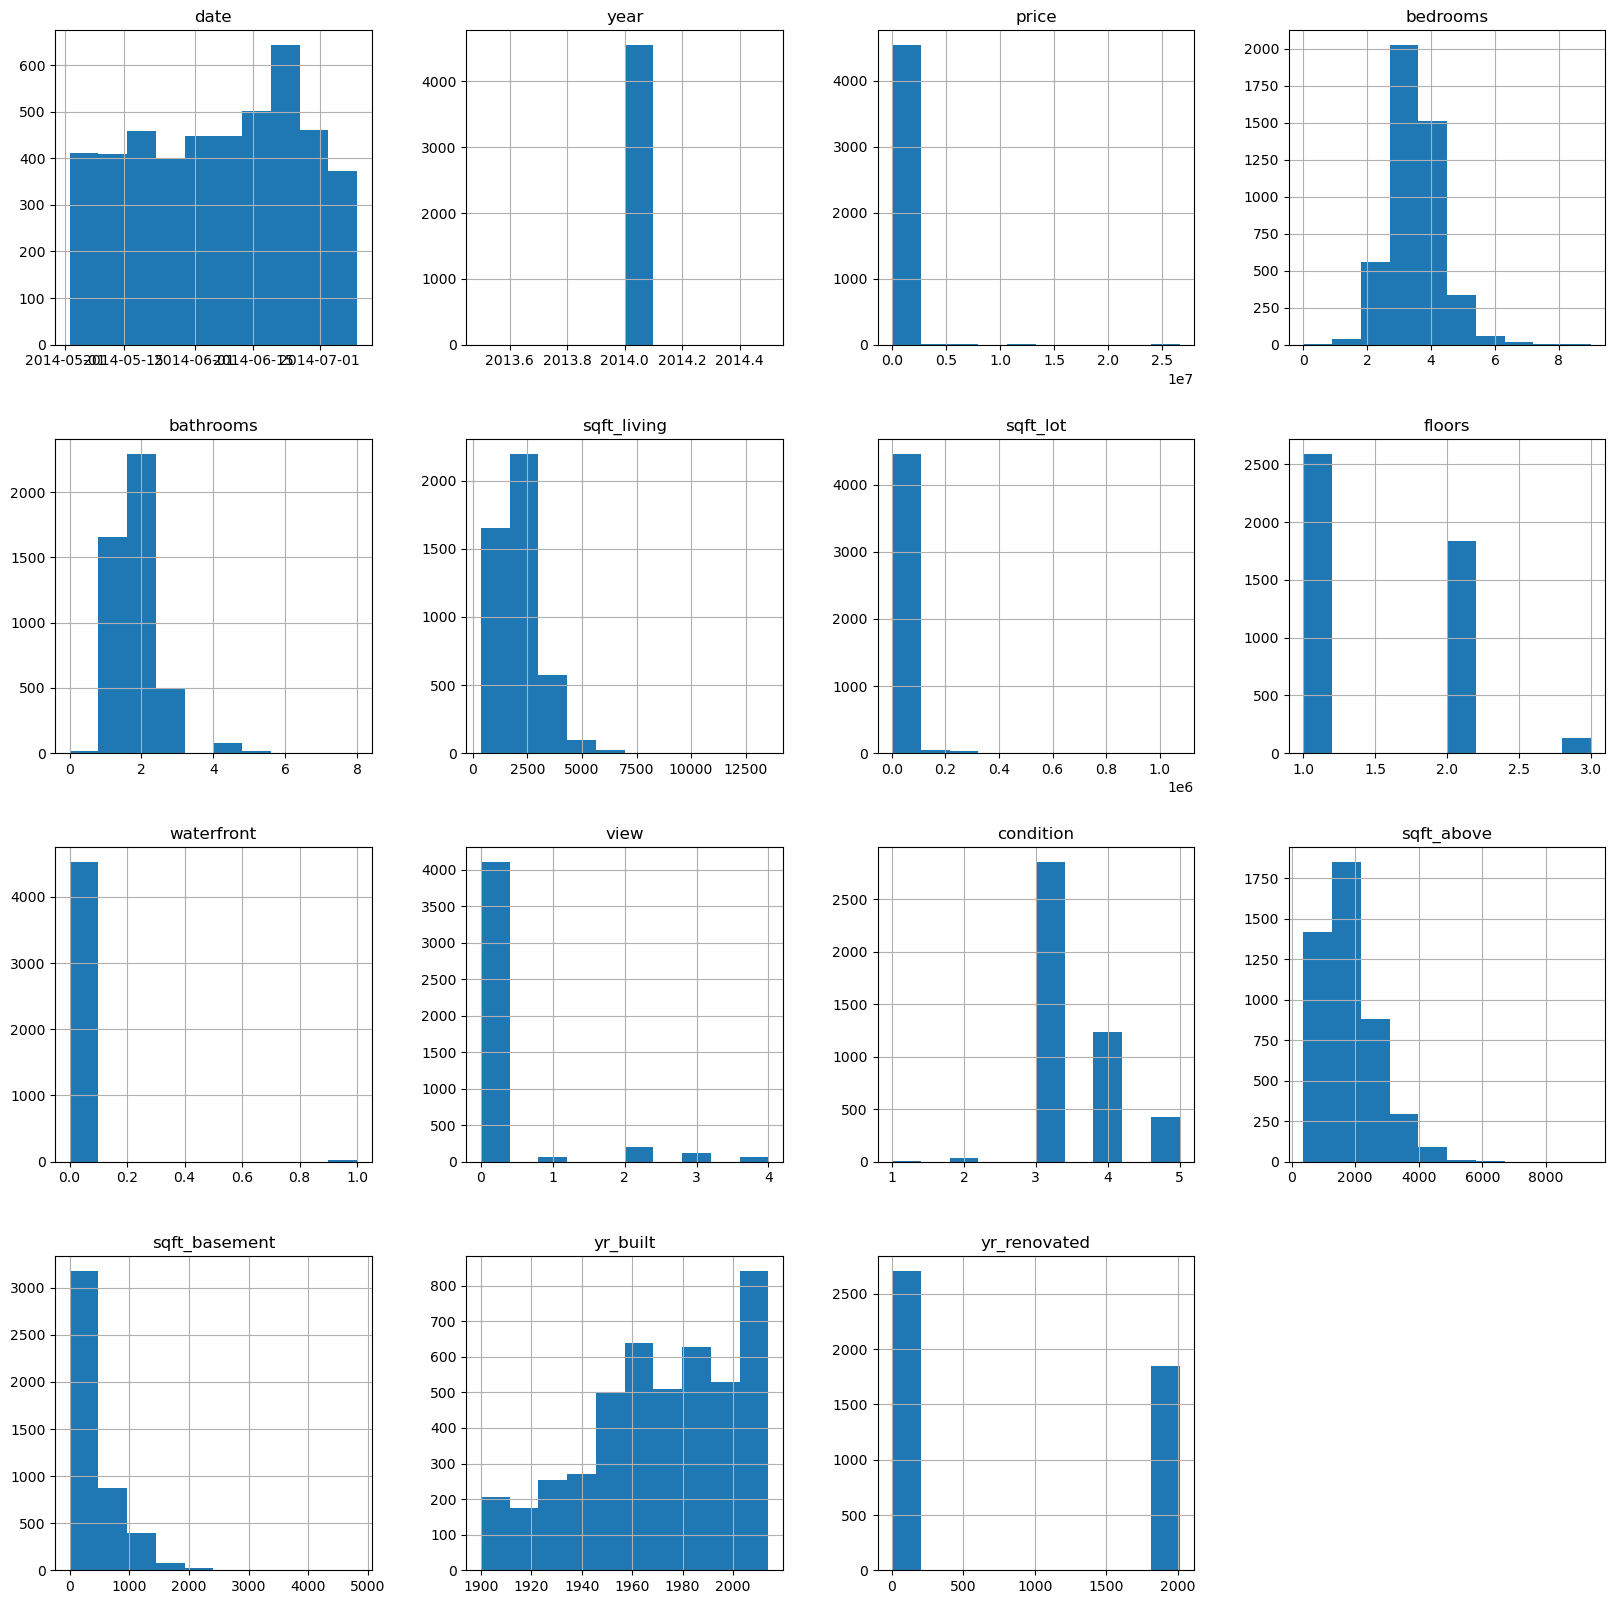

In [27]:
data.hist(figsize=(20,20))

In [28]:
#data['sqft_lot']=np.log(data['sqft_lot'])+1
#data['sqft_living']=np.log(data['sqft_living'])+1
#data['sqft_above']=np.log(data['sqft_above'])+1
#data['sqft_basement']=np.log(data['sqft_basement'])+1

In [29]:
data.city.value_counts()

Seattle                1561
Renton                  291
Bellevue                281
Redmond                 235
Kirkland                187
Issaquah                186
Kent                    184
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
North Bend               50
Duvall                   42
Covington                42
Lake Forest Park         34
Newcastle                33
Bothell                  33
Tukwila                  29
Vashon                   29
SeaTac                   28
Enumclaw                 27
Carnation                22
Normandy Park            17
Fall City                11
Medina                   11
Clyde Hill                9
Black Diamond             8
Ravensdale                7
Pacific             

In [30]:
pd.get_dummies(data.city)

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [31]:
data_x = pd.get_dummies(data, columns=['city'])
data_x

,date,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02,2014,313000.0,3,1,1340,7912,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02,2014,2384000.0,5,2,3650,9050,2,0,4,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02,2014,342000.0,3,2,1930,11947,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02,2014,420000.0,3,2,2000,8030,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02,2014,550000.0,4,2,1940,10500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,2014,308166.0,3,1,1510,6360,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4596,2014-07-09,2014,534333.0,3,2,1460,7573,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,2014-07-09,2014,416904.0,3,2,3010,7014,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,2014-07-10,2014,203400.0,4,2,2090,6630,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [32]:
data_x=data_x.drop(["date","street","statezip","country"],axis=1)
data_x

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014,313000.0,3,1,1340,7912,1,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014,2384000.0,5,2,3650,9050,2,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014,342000.0,3,2,1930,11947,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014,420000.0,3,2,2000,8030,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014,550000.0,4,2,1940,10500,1,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014,308166.0,3,1,1510,6360,1,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,2014,534333.0,3,2,1460,7573,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,2014,416904.0,3,2,3010,7014,2,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,2014,203400.0,4,2,2090,6630,1,0,0,3,...,0,1,0,0,0,0,0,0,0,0


In [33]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4551 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      4551 non-null   int64  
 1   price                     4551 non-null   float64
 2   bedrooms                  4551 non-null   int64  
 3   bathrooms                 4551 non-null   int64  
 4   sqft_living               4551 non-null   int64  
 5   sqft_lot                  4551 non-null   int64  
 6   floors                    4551 non-null   int64  
 7   waterfront                4551 non-null   int64  
 8   view                      4551 non-null   int64  
 9   condition                 4551 non-null   int64  
 10  sqft_above                4551 non-null   int64  
 11  sqft_basement             4551 non-null   int64  
 12  yr_built                  4551 non-null   int64  
 13  yr_renovated              4551 non-null   int64  
 14  city_Alg

In [34]:
col=data_x.columns

In [35]:
scaler = preprocessing.MinMaxScaler(feature_range = (0, 1))
datascaler = pd.DataFrame(scaler.fit_transform(data_x), columns = col)

In [36]:
datascaler

,year,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,0.0,0.011481,0.333333,0.125,0.073652,0.006775,0.0,0.0,0.0,0.50,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.089391,0.555556,0.250,0.249051,0.007835,0.5,0.0,1.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.012572,0.333333,0.250,0.118451,0.010534,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.015507,0.333333,0.250,0.123766,0.006885,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.020397,0.444444,0.250,0.119210,0.009186,0.0,0.0,0.0,0.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4546,0.0,0.011300,0.333333,0.125,0.086560,0.005330,0.0,0.0,0.0,0.75,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4547,0.0,0.019808,0.333333,0.250,0.082764,0.006460,0.5,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4548,0.0,0.015390,0.333333,0.250,0.200456,0.005939,0.5,0.0,0.0,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4549,0.0,0.007358,0.444444,0.250,0.130600,0.005581,0.0,0.0,0.0,0.50,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: title={'center': 'HEAT MAP AFTER PREPROCESSING'}>

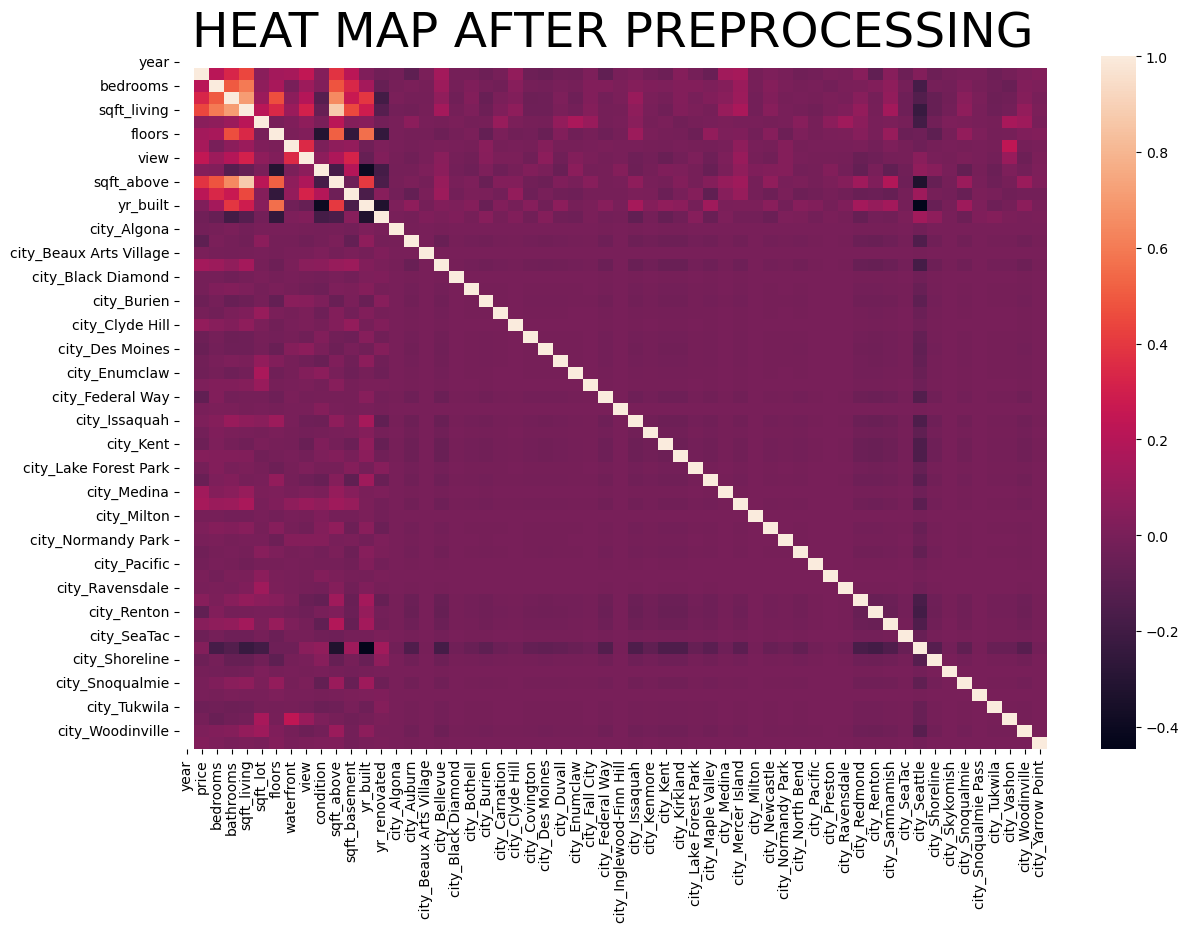

In [37]:
plt.figure(figsize=(14,9))
plt.title("HEAT MAP AFTER PREPROCESSING",size=35)
sns.heatmap(datascaler.corr(numeric_only = True), annot=False)

In [38]:
x = datascaler.drop("price", axis=1)
y = pd.DataFrame(datascaler["price"])

In [39]:
clusters = DBSCAN(eps=0.9, min_samples=3).fit(x)
clusters.labels_

array([ 0,  1,  2, ..., 24,  1, 35], dtype=int64)

In [40]:
x["noise"] = clusters.labels_
y["noise"] = clusters.labels_

In [41]:
x = x[x.noise>-1]
y = y[y.noise>-1]
x.drop('noise', inplace = True, axis=1)
y.drop('noise', inplace = True, axis=1)

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [43]:
lr=LinearRegression()

In [44]:
x_train

,year,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
2352,0.0,0.222222,0.125,0.046469,0.000194,0.5,0.0,0.0,0.50,0.048230,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
599,0.0,0.333333,0.250,0.157935,0.038695,0.0,0.0,0.0,0.75,0.230088,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1610,0.0,0.333333,0.125,0.117692,0.004440,0.0,0.0,0.5,0.75,0.065265,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3126,0.0,0.333333,0.125,0.108580,0.004995,0.0,0.0,0.0,1.00,0.058628,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1356,0.0,0.222222,0.125,0.050873,0.004554,0.0,0.0,0.0,0.50,0.074115,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,0.0,0.333333,0.250,0.138952,0.015167,0.5,0.0,0.0,0.50,0.202434,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
81,0.0,0.444444,0.375,0.252088,0.008620,0.5,0.0,0.0,0.50,0.367257,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4020,0.0,0.555556,0.250,0.184510,0.015975,0.0,0.0,0.0,0.75,0.113938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2426,0.0,0.222222,0.125,0.041002,0.008598,0.0,0.0,0.0,0.50,0.059735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
y_train

,price
2352,0.009111
599,0.016635
1610,0.018140
3126,0.017425
1356,0.019833
...,...
490,0.015130
81,0.032247
4020,0.024723
2426,0.008096


In [46]:
lr.fit(x_train,y_train)

LinearRegression()

In [47]:
y_pred=lr.predict(x_test)

In [48]:
print("Mean Absolute Error                            : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error                             : ", metrics.mean_squared_error(y_test, y_pred))
print("coefficient of determination of the prediction : ", lr.score(x_test,y_test)*100)

Mean Absolute Error                            :  0.004308892058064788
Mean Squared Error                             :  4.0491026353908424e-05
coefficient of determination of the prediction :  70.99464816721428
